In [4]:
%run './model/multi_corpus.py'
%run './constants.py'

import itertools
from collections import Counter

In [2]:
corpora = co_occurence_graphs(n_edges=100)
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 57 nodes and 100 edges
Geometry Graph with 61 nodes and 100 edges
Geophysics Graph with 63 nodes and 100 edges
Economics Graph with 50 nodes and 100 edges
Language & Linguistics Graph with 58 nodes and 100 edges
Probability & Statistics Graph with 58 nodes and 100 edges
Material Engineering Graph with 49 nodes and 100 edges
Artificial Intelligence Graph with 49 nodes and 100 edges
Sociology Graph with 76 nodes and 100 edges
International Business Graph with 51 nodes and 100 edges
Political Science Graph with 56 nodes and 100 edges
Genetics & Genomics Graph with 71 nodes and 100 edges
Immunology Graph with 92 nodes and 100 edges
Human Resources & Organizations Graph with 66 nodes and 100 edges
Ethnic & Cultural Studies Graph with 52 nodes and 100 edges
Neurology Graph with 46 nodes and 100 edges


Gender Studies


/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_70894/4074123658.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


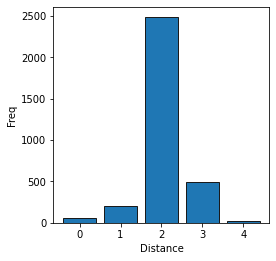

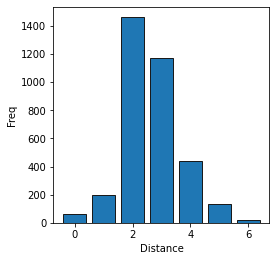

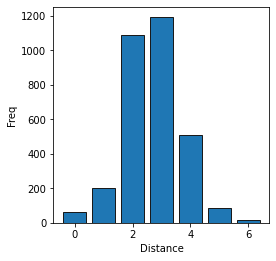

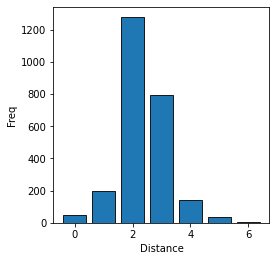

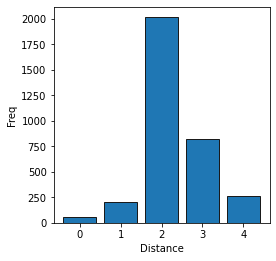

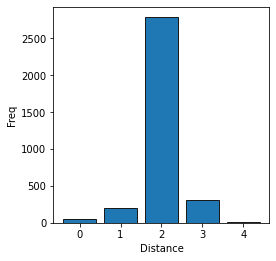

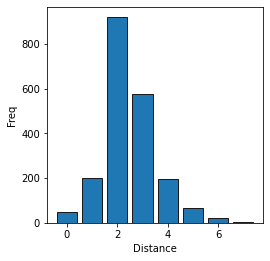

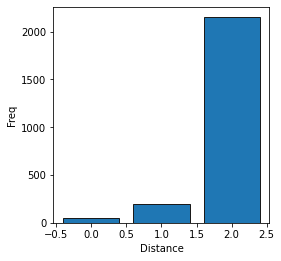

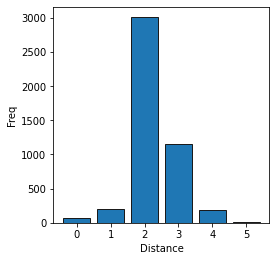

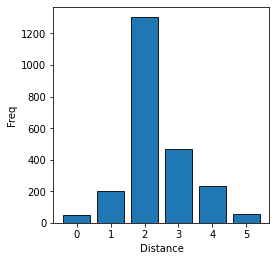

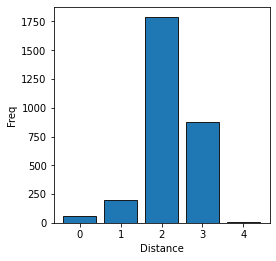

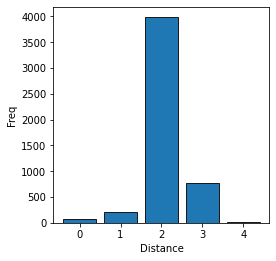

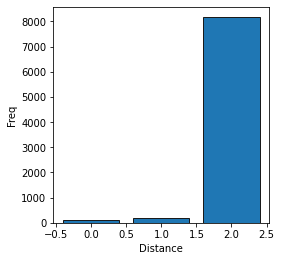

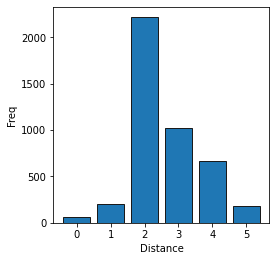

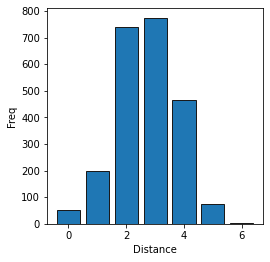

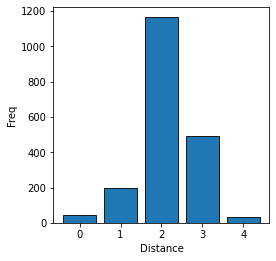

In [5]:
sns.reset_defaults()

for field_name, G in Gs.items():

    print(field_name)

    shortest_path_dist = dict(nx.all_pairs_shortest_path_length(G))
    distances = list(itertools.chain.from_iterable([d.values() for d in shortest_path_dist.values()]))
    dist, freq = zip(*Counter(distances).items())

    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_axes([0, 0, 1, 1])

    plt.bar(dist, freq, edgecolor='k')

    ax.set_xlabel('Distance')
    ax.set_ylabel('Freq')

    fig.tight_layout()

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'co_occurrence_node_distance_dist', f'{field_name.capitalize()}.png'), 
        transparent=True,
        dpi=150,
        bbox_inches='tight'
    )